<a href="https://colab.research.google.com/github/Messed-up/Stock-Predictor/blob/main/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gamestop (GME) Datasets - Yahoo Finance.xls to Gamestop (GME) Datasets - Yahoo Finance.xls


In [ ]:
df = pd.read_excel('Gamestop (GME) Datasets - Yahoo Finance.xls')
df.head

<bound method NDFrame.head of           Date        Open        High  ...       Close   Adj Close    Volume
0   2019-01-02   12.450000   13.180000  ...   13.070000   12.641105   2124200
1   2019-01-03   12.980000   13.260000  ...   12.970000   12.544387   1750400
2   2019-01-04   14.030000   15.290000  ...   15.240000   14.739896  11915700
3   2019-01-07   15.110000   15.810000  ...   15.480000   14.972020   4718000
4   2019-01-08   15.500000   15.890000  ...   15.810000   15.291192   3443800
..         ...         ...         ...  ...         ...         ...       ...
561 2021-03-25  123.489998  187.500000  ...  183.750000  183.750000  50962300
562 2021-03-26  197.679993  218.929993  ...  181.000000  181.000000  37371900
563 2021-03-29  180.750000  193.919998  ...  181.300003  181.300003  10042200
564 2021-03-30  187.500000  204.300003  ...  194.460007  194.460007  17094900
565 2021-03-31  197.500000  199.460007  ...  189.820007  189.820007   8393800

[566 rows x 7 columns]>

In [ ]:
column = df[['Date','Close']]
data = column.copy()
data.head       #2015-12-16
data.tail       #2019-12-16

<bound method NDFrame.tail of           Date       Close
0   2019-01-02   13.070000
1   2019-01-03   12.970000
2   2019-01-04   15.240000
3   2019-01-07   15.480000
4   2019-01-08   15.810000
..         ...         ...
561 2021-03-25  183.750000
562 2021-03-26  181.000000
563 2021-03-29  181.300003
564 2021-03-30  194.460007
565 2021-03-31  189.820007

[566 rows x 2 columns]>

In [ ]:
short_rolling = data.rolling(window=40).mean()
short_rolling.head(40)

In [ ]:
long_rolling = data.rolling(window=50).mean()
long_rolling.tail()

,Close
561,126.560000
562,129.552000
563,132.379801
564,135.559001
565,138.568201


In [ ]:
start_date = '2016-04-01'
end_date = '2021-04-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [ ]:
ema_short = data.ewm(span= 10, adjust=False).mean()

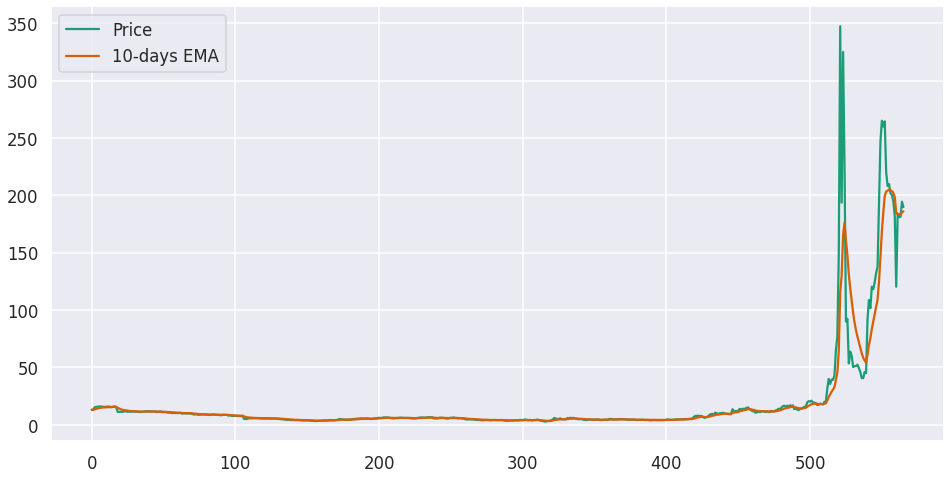

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Price')
plt.plot(ema_short['Close'], label = '10-days EMA')
#plt.plot(short_rolling['Close'], label = '10-days SMA')

plt.legend(loc='best')